In [22]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# for plotting consistently with abu_profile
from nugridpy import utils as u

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [23]:
# read in the mesa star log files
star = ms.star_log(mass=2.0,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


<IPython.core.display.Javascript object>


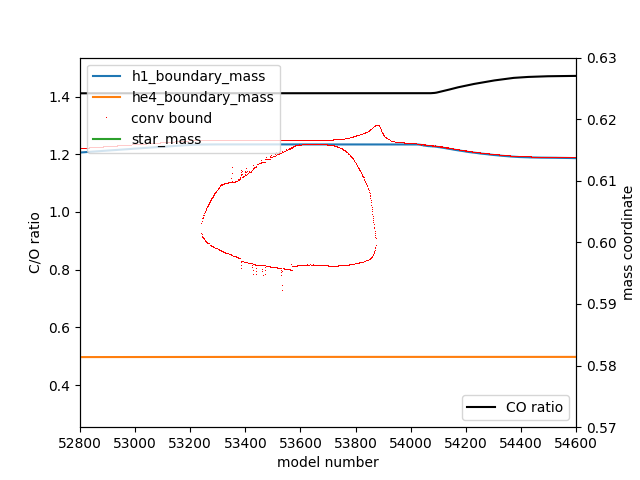

(0.57, 0.63)

In [24]:
# make a kippenhahn diagram
plt.figure(10)
star.kippenhahn_CO(10,'model')

# limits
plt.xlim([52800,54600])
plt.ylim([0.57,0.63])

In [25]:
# set path to where the diffusion data is
path_DC = '/user/ast501/dstephens/mppnp/diffusion_changes/diffusion_jones/mppnp_subtime_0/H5_out'
path_D = '/user/ast501/dstephens/mppnp/diffusion_mesa/mppnp_subtime_0/H5_out'

# read in data
star_pp_D = mp.se(path_D,rewrite=True)
star_pp_DC = mp.se(path_DC,rewrite=True)

Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0053001.out.h5
M2.00Z0.020.0053501.out.h5
File search complete.
Closing plot_tools
Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0053001.out.h5Closing plot_tools

M2.00Z0.020.0053501.out.h5
File search complete.


In [52]:
# function to find the maximum extent of convection zone as well as the average extent

def mass_bounds(star,model_range):
    # just need the star objects, and the model range that the convection zone is contained in

    # get the mass ranges of convection boundary
    star_mass = star.get('star_mass')[model_range[0]:model_range[1]]
    mix_low = star.get('mx2_bot')[model_range[0]:model_range[1]]
    mix_high = star.get('mx2_top')[model_range[0]:model_range[1]]
    
    # find where they are zero or not
    convection_bounds = []
    for i in range(len(star_mass) - 1):
        
        # make sure that there is convection and that the next element doesnt stop
        if mix_low[i] >= 1e-9 and mix_low[i+1] >= 1e-9:
            convection_bounds.append(i)
            
    # slice the arrays to the appropriate size
    star_mass = star_mass[convection_bounds[0]:(convection_bounds[-1] + 1)]
    mix_low = mix_low[convection_bounds[0]:(convection_bounds[-1] + 1)] * star_mass
    mix_high = mix_high[convection_bounds[0]:(convection_bounds[-1] + 1)] * star_mass
    
    # make sure that if there
    
    # return the max convection bounds as well as average AND new model range
    max_bounds = [min(mix_low),max(mix_high)]
    avg_bounds = [np.mean(mix_low),np.mean(mix_high)]
    model_range = [model_range[0] + convection_bounds[0], model_range[0] + convection_bounds[-1]]
    
    return max_bounds,avg_bounds, model_range

# function to find the nearest mass element index to a particular mass

def find_mass_index(star_pp,model,mass_interest):
    
    # check if model is a list of multiple stars to look through
    if type(model) != list:
        model = [model]
        iterate = len(model)
    else:
        iterate = len(model)
    
    # check if mass interest is a list or not
    mass_bool = 0
    if type(mass_interest) == list:
        mass_bool = 1 
    
    # create a np array to hold the mass index
    mass_index = np.zeros((iterate))
    
    # iterate through
    for i in range(iterate):
        
        # read in the mass array
        mass = star_pp.se.get(model[i],'mass')
        
        # check if mass is a list
        if np.shape(mass)[0] == 2:
            mass = mass[0]
        
        # is mass interest a list
        if mass_bool:
            mass_index[i] = np.argmin(abs(mass_interest[i] - mass))
        else:
            mass_index[i] = np.argmin(abs(mass_interest - mass))
    
    # return the mass index array
    return mass_index

In [53]:
# look at the lowest time step model
model = 53600

# model ranges in the thermal pulse
model_range = [53200,53900]

# species of interest at s-process synthesis sight
species = ['Neutron-1','Mg-25','Zr-94','Zr-96','Ne-22','Xe-128','Xe-130']

# get and print convection zone limits
star_mass = star.get('star_mass')[model_range[0]:model_range[1]]
mix_low = star.get('mx2_bot')[model_range[0]:model_range[1]] * star_mass
mix_high = star.get('mx2_top')[model_range[0]:model_range[1]] * star_mass

print(mix_low[model - model_range[0] - 1], mix_high[model - model_range[0] - 1])

0.596182476786 0.615694423675


In [54]:
# get the max and min convective bounds, as well as average
max_min_bounds, avg_bounds,new_model_range = mass_bounds(star,model_range)

# find schwarz bounds for this mass range
low = find_mass_index(star_pp_D,model,star.get('mx2_bot')[model-1]*star.get('star_mass')[model-1])
high = find_mass_index(star_pp_D,model,star.get('mx2_top')[model-1]*star.get('star_mass')[model-1])

schwarz = [low,high]

 reading ['mass']...100%

In [40]:
print(max_min_bounds)
print(avg_bounds)
print(new_model_range)

[0.592142944068618, 0.61578422302431635]
[0.59677156061880876, 0.61232439340439138]
[53242, 53872]


<IPython.core.display.Javascript object>


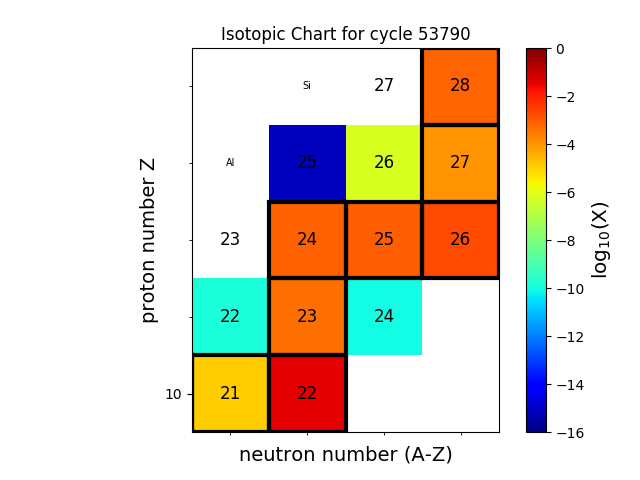

 reading ['mass']...100%.100%

In [41]:
# create abu_chart
plt.figure(193)
star_pp_DC.abu_chart(53790,avg_bounds,ifig=193,plotaxis=[10.5,14.5,9.5,14.5],lbound=[-16,0])

<IPython.core.display.Javascript object>


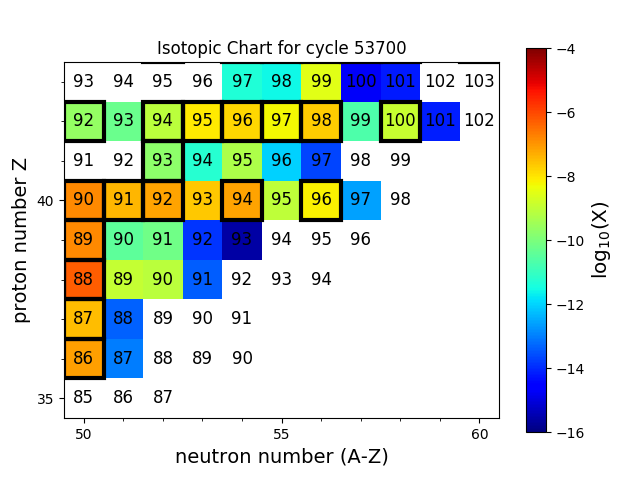

 reading ['mass']...100%.100%

In [42]:
# create abu_chart
plt.figure(192)
star_pp_DC.abu_chart(53700,avg_bounds,ifig=192,plotaxis=[49.5,60.5,34.5,43.5],lbound=[-16,-4])

<IPython.core.display.Javascript object>


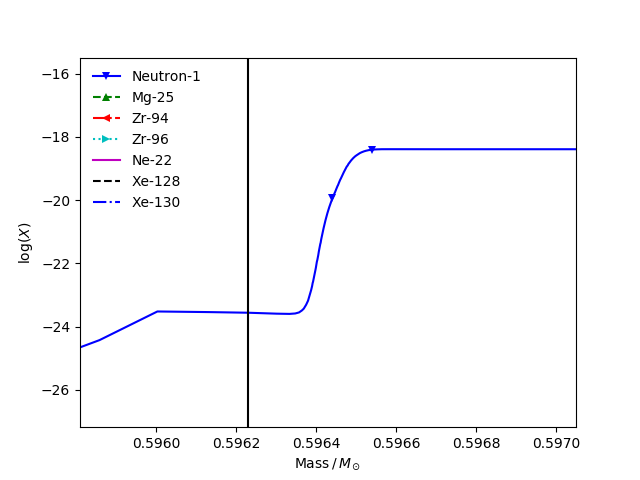

 reading ['iso_massf']...100%

In [60]:
plt.figure(1)
star_pp_DC.abu_profile(isos=species,ifig=1,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(mass[int(schwarz[0][0])],color='k',linestyle='-',label='Schwarz Boundary')
plt.axvline(mass[int(schwarz[1][0])],color='k',linestyle='-',label='Schwarz Boundary')

# limits (look at lower boundary)
# plt.ylim([-10,-6.5])
plt.xlim([0.55,0.65])

# get the xlim
xlim_mesa = plt.gca().get_xlim()
ylim_mesa = plt.gca().get_ylim()

<IPython.core.display.Javascript object>


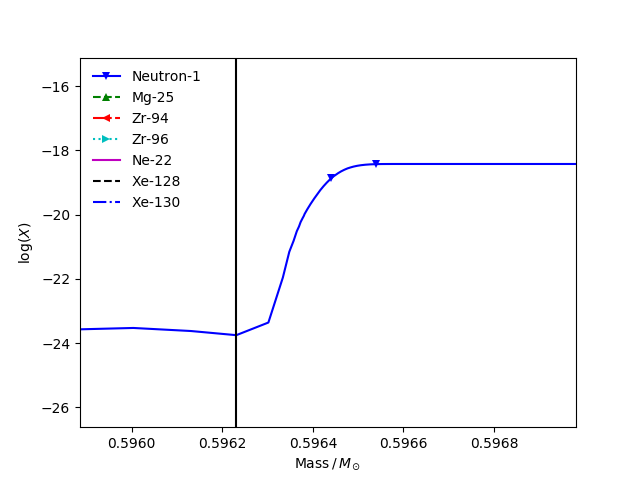

 reading ['iso_massf']...100%

(0.55000000000000004, 0.65000000000000002)

In [59]:
# look at original data
plt.figure(2)

star_pp_D.abu_profile(isos=species,ifig=2,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(mass[int(schwarz[0][0])],color='k',linestyle='-',label='Schwarz Boundary')
plt.axvline(mass[int(schwarz[1][0])],color='k',linestyle='-',label='Schwarz Boundary')

# look at lower boundary
plt.ylim(ylim_mesa)
plt.xlim(xlim_mesa)

In [45]:
# make a plot of abundances but take the difference between the mass fractions
iso_massf_D = star_pp_D.get(model,'iso_massf')
iso_massf_DC = star_pp_DC.get(model,'iso_massf')
mass = star_pp_DC.get(model,'mass')

iso_ratio = np.log10(iso_massf_DC) - np.log10(iso_massf_D)

# get the isotope key
iso_keys = star_pp_D.se.isotopes

 reading ['mass']...100%.100%

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


In [46]:
# find indices corresponding to species list
iso_index = []
for i in range(len(species)):
    for p in range(len(iso_keys)):
        if species[i] == iso_keys[p]:
            iso_index.append(p)
            break

Make a plot of the ratio of species near the lower schwarzschild boundary

In [57]:
schwarz

[array([ 507.]), array([ 1035.])]

<IPython.core.display.Javascript object>


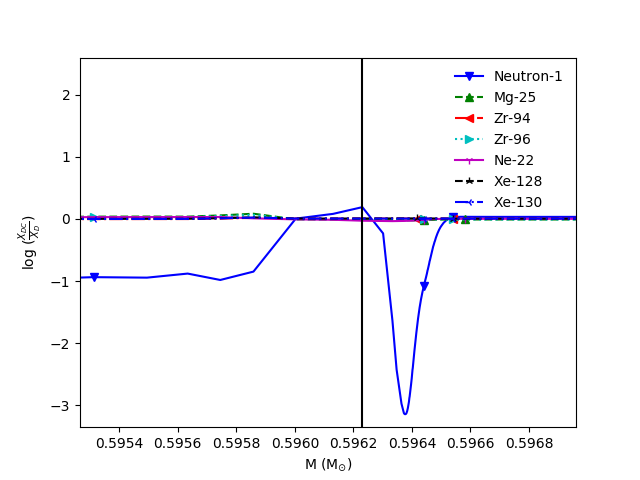

In [58]:
# make a plot of the iso ratio
plt.figure(3)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(mass[int(schwarz[0][0])],color='k',linestyle='-')
plt.axvline(mass[int(schwarz[1][0])],color='k',linestyle='-')

# limits
plt.xlim([0.58,0.62])
# plt.ylim([-0.05,0.15])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)

Make a plot of the ratio of species at the upper boundary

<IPython.core.display.Javascript object>


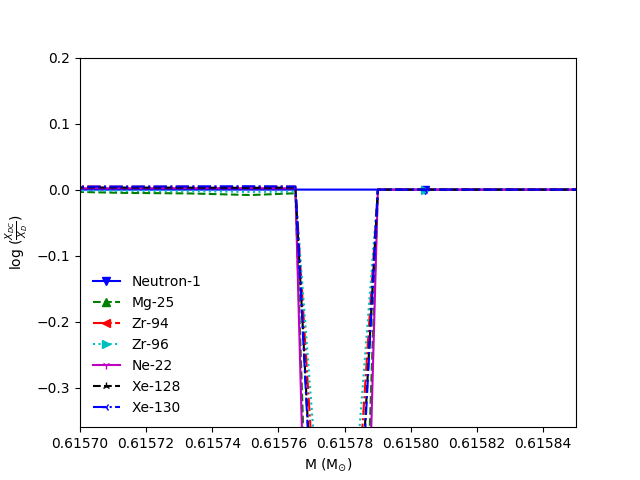

In [16]:
# make a plot of the iso ratio
plt.figure(4)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(avg_bounds[0],color='k',linestyle='-')
plt.axvline(max_min_bounds[0],color='k',linestyle='-')

# limits
plt.xlim([0.6157,0.61585])
plt.ylim([-.36,0.2])

plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)

Rewrite the Zr 96 to Zr 94 ratios in terms of the deviation in parts per thousand from the solar values

In [ ]:
star_pp_DC.iso_abund?

<IPython.core.display.Javascript object>


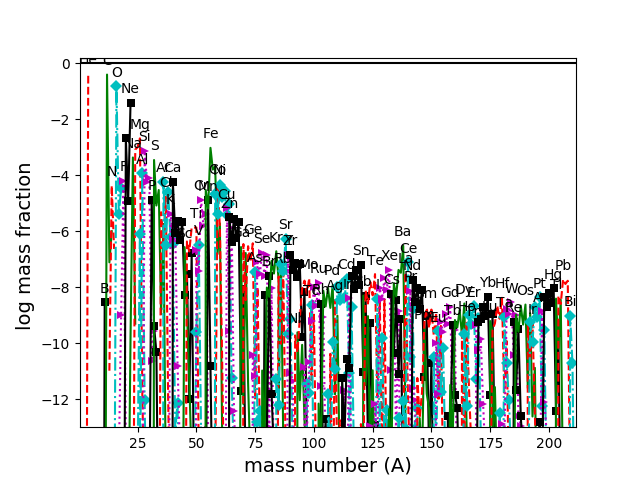

 reading ['mass']...100%Using the following conditions:
	mass_range: 0.592142944069 0.615784223024
	Atomic mass_range: 1 211
	cycle:            0000053750
	plot only stable: False
	plot decayed:     False


In [17]:
plt.figure(199)
star_pp_DC.iso_abund(cycle=model,mass_range=[max_min_bounds[0],max_min_bounds[1]])

In [18]:
10**(-8.096 - (-7.17))

0.11857687481671597

In [19]:
# read in the abundace file
path = '/user/david/github/Astr501/David Project/iniab.txt'
solar_abn = np,genfromtxt(path,delimiter=' ',unpack=True,dtype=str)

# Zr (90,91,92,94,96)
Zr_abun = []

# find the zr strings
for i in range(len(solar_abn[1])):
    if solar_abn[1][i] == 'zr':   
        
        # the isotope abundance value is 2 after
        Zr_abun.append(float(solar_abn[1][i+2]))
        
# get the relevent ratios
ratio_90_94 = Zr_abun[0] / Zr_abun[3]
ratio_91_94 = Zr_abun[1] / Zr_abun[3]
ratio_92_94 = Zr_abun[2] / Zr_abun[3]
ratio_96_94 = Zr_abun[-1] / Zr_abun[3]

In [20]:
((1/9.) / ratio_96_94 - 1) * 1e3

-324.6858465554594

In [ ]:
# solar value is the model 1 abundance, need nugrid data
star_pp_nugrid = mp.se(mass=2.0,Z=0.02)

# get the model 0 iso_massf
nugrid_iso = star_pp_nugrid.get(1,'iso_massf')

# make a plot of the ratios of Zr 94 / Zr 96
Zr_loc = []
Zr_strings = ['Zr-96','Zr-94','Zr-90','Zr-91','Zr-92']

for p in range(len(Zr_strings)):
    for i in range(len(iso_keys)):
        if iso_keys[i] == Zr_strings[p]:
            Zr_loc.append(i)
            
# earth ratios
earth_zr_ratio = 7.94e-10 / 4.83e-09

# get the Zr94 and Zr 96 mass fractions
solar_zr94 = np.mean(nugrid_iso[:,Zr_loc[1]])
solar_zr96 = np.mean(nugrid_iso[:,Zr_loc[0]])

In [ ]:
# get the model 0 iso_massf
nugrid_iso = star_pp_nugrid.get(1,'iso_massf')

# earth ratios
earth_zr_ratio = 7.94e-10 / 4.83e-09

# get the Zr94 and Zr 96 mass fractions
solar_zr94 = np.mean(nugrid_iso[:,Zr_loc[1]])
solar_zr96 = np.mean(nugrid_iso[:,Zr_loc[0]])

# get the parts per thousand deviation
mil_DC = ((iso_massf_DC[:,Zr_loc[0]] / iso_massf_DC[:,Zr_loc[1]]) / (ratio_96_94) - 1) * 1e3
mil_D = ((iso_massf_D[:,Zr_loc[0]] / iso_massf_D[:,Zr_loc[1]]) / (ratio_96_94) - 1) * 1e3

# # make ratio
# Zr_ratio_DC = iso_massf_DC[:,Zr_loc[0]] / iso_massf_DC[:,Zr_loc[1]]
# Zr_ratio_D = iso_massf_D[:,Zr_loc[0]] / iso_massf_D[:,Zr_loc[1]]

# plot
plt.figure(11)

plt.plot(mass,mil_DC,label='DC')
plt.plot(mass,mil_D,label='D')
  
plt.axvline(max_min_bounds[0],color='k',linestyle='-')
plt.axvline(max_min_bounds[1],color='k',linestyle='-')

plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{^{96}Zr}{^{94}Zr}$)')

plt.legend().draw_frame(False)

# limits
plt.xlim([0.58,0.616])
# plt.ylim([-1.2,-0.8])

## Ensure Diffusion Coefficient Changed

In [ ]:
# get the diffusion coefficient at model 53400
model = 53400

# find the mass indices for the avg schwarz bounds
lower_D = int(find_mass_index(star_pp_D,model,avg_bounds[0]))
upper_D = int(find_mass_index(star_pp_D,model,avg_bounds[1]))

diff_D = star_pp_D.se.get(model,'dcoeff')[0][lower_D:upper_D]
diff_DC = star_pp_DC.se.get(model,'dcoeff')[0][lower_D:upper_D]
mass_D = star_pp_DC.se.get(model,'mass')[0][lower_D:upper_D]

# make plot
fig = plt.figure(544)
ax = fig.add_subplot(111)
ax.plot(mass_D,diff_D)
ax.plot(mass_D,diff_DC)
ax.semilogy()

Look for the cause of the Mg and Zr 96 spikes

In [ ]:
# look at earlier models
model = 53000

# make a plot of abundances but take the difference between the mass fractions
iso_massf_D = star_pp_D.get(model,'iso_massf')
iso_massf_DC = star_pp_DC.get(model,'iso_massf')
mass = star_pp_DC.get(model,'mass')

iso_ratio = np.log10(iso_massf_DC[0]) - np.log10(iso_massf_D[0])

This shows the impact fo the starting of the first model, there is a difference right at the first model. I am not sure what this could be exactly, they both start at 53200

In [ ]:
# make a plot of the iso ratio
plt.figure(6)
for i in range(len(iso_index)):
    plt.plot(mass[0],iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
# plt.axvline(avg_bounds[0],color='k',linestyle='-')
# plt.axvline(max_min_bounds[0],color='k',linestyle='-')

# limits
# plt.xlim([0.59,0.598])
plt.ylim([-0.05,0.15])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)

In [ ]:
# look at earlier models
model = 53800

# make a plot of abundances but take the difference between the mass fractions
iso_massf_D = star_pp_D.get(model,'iso_massf')
iso_massf_DC = star_pp_DC.get(model,'iso_massf')
mass = star_pp_DC.get(model,'mass')

iso_ratio = np.log10(iso_massf_DC) - np.log10(iso_massf_D)

The purple dashed line is the actual convective boundary for this model. There is a high enough of a temperature at model 53700 (log T ~ 8.4) to start the Ne22 reaction in a small pocket 

In [ ]:
# make a plot of the iso ratio
plt.figure(7)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(avg_bounds[0],color='k',linestyle='-')
plt.axvline(max_min_bounds[0],color='k',linestyle='-')

# plot where it's schwarzschild boundary is
mass_boundary = star.get('mx2_bot')[model-1] * star.get('star_mass')[model-1]
mass_index = int(find_mass_index(star_pp_DC,model,mass_boundary)[0])
plt.axvline(mass[mass_index],color='m',linestyle='--')

# limits
plt.xlim([0.592,0.597])
plt.ylim([-0.05,0.25])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)

In [ ]:
# make a plot of the iso ratio
plt.figure(8)
star_pp_DC.abu_profile(isos=species,ifig=8,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(avg_bounds[0],color='k',linestyle='-')
plt.axvline(max_min_bounds[0],color='k',linestyle='-')

# plot where it's schwarzschild boundary is
mass_boundary = star.get('mx2_bot')[model-1] * star.get('star_mass')[model-1]
mass_index = int(find_mass_index(star_pp_DC,model,mass_boundary)[0])
plt.axvline(mass[mass_index],color='m',linestyle='--')

# limits
plt.xlim([0.592,0.597])
# plt.ylim([-0.05,0.25])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($X_{DC}$)')

# legend
# plt.legend().draw_frame(False)

In [ ]:
path_DC10 = '/user/ast501/dstephens/mppnp/diffusion_changes/mppnp_subtime_10/H5_out'

star_pp_DC10 = mp.se(path_DC10,rewrite=True)

## Check If Subtime Worked

In [ ]:
# grab the iso_massf data and see if model after model changes
iso_1 = star_pp_DC10.se.get(53880,'iso_massf')
iso_2 = star_pp_DC10.se.get(53881,'iso_massf')

# take difference, find mean
print np.mean(iso_1[1] - iso_2[1])

In [ ]:
star_pp_DC10.se.

In [ ]:
print np.shape(iso_1[0])
print np.shape(iso_2[0])

In [ ]:
model = 53880 + 680 * 10

plt.figure(15)
star_pp_DC10.abu_profile(isos=species,ifig=15,fname=model,logy=True)

# plot vertical line at the lower schwarz
plt.axvline(avg_bounds[0],color='k',linestyle='-',label='Schwarz Boundary')
plt.axvline(avg_bounds[1],color='k',linestyle='-',label='Schwarz Boundary')

# limits (look at lower boundary)
# plt.ylim([-10,-6.5])
plt.xlim([0.55,0.65])

In [ ]:
iso_massf_DC10 = star_pp_DC10.get(53880 + 680*10,'iso_massf')
iso_massf_DC = star_pp_DC.get(53880,'iso_massf')
print np.shape(iso_massf_DC10)
print np.shape(iso_massf_DC)

In [ ]:
iso_massf_DC10 = star_pp_DC10.get(model,'iso_massf')
iso_massf_DC = star_pp_D.get(53880,'iso_massf')
mass = star_pp_DC10.get(model,'mass')

iso_ratio = np.log10(iso_massf_DC10) - np.log10(iso_massf_D)

In [ ]:
plt.figure(17)
for i in range(len(iso_index)):
    plt.plot(mass,iso_ratio[:,iso_index[i]],u.linestyle(i)[0],label=iso_keys[iso_index[i]],
             markevery=u.linestyle(i)[1]*20)

# plot vertical line at the lower schwarz
plt.axvline(avg_bounds[0],color='k',linestyle='-')
plt.axvline(max_min_bounds[0],color='k',linestyle='-')

# plot where it's schwarzschild boundary is
mass_boundary = star.get('mx2_bot')[53880-1] * star.get('star_mass')[53880-1]
mass_index = int(find_mass_index(star_pp_DC,53880,mass_boundary)[0])
plt.axvline(mass[mass_index],color='m',linestyle='--')

# limits
# plt.xlim([0.592,0.597])
# plt.ylim([-0.05,0.25])

# labels
plt.xlabel(r'M (M$_{\odot}$)')
plt.ylabel(r'log ($\frac{X_{DC}}{X_{D}}$)')

# legend
plt.legend().draw_frame(False)